In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [24]:
# Load in csv
# df1 = pd.read_csv("data_bucketed.csv", encoding = 'utf-8')
# df1
k_df2 = pd.read_csv('data_bucketed.csv').drop(['Index'],axis=1).sort_values(by=['quatity score'], ascending = False)
k_df2.rename(columns={"city":"City","quatity score":"quantity score"})
k_df2.head(15)

City  quatity score  business score  Cost of Living Index  \
194  San Francisco          29.14             3.8                 178.6   
183       New York          11.43             3.8                 128.0   
189    Los Angeles          11.23             3.8                 140.6   
184         Boston           5.50             3.8                 132.6   
128        Chicago           4.37             3.8                 100.1   
181        Seattle           3.49             3.8                 124.6   
179     Washington           3.47             3.8                 120.1   
166          Miami           3.21             3.8                 110.1   
155         Austin           3.20             3.8                 106.6   
118         Dallas           2.90             3.8                  98.5   
187      San Diego           2.64             3.8                 136.2   
130        Atlanta           2.59             3.8                 100.3   
172         Denver           2.36             3.8                 112.1   
146   Philadelphia           1.70             3.8                 103.4   
148        Phoenix           1.58             3.8                 104.3   

     Bucket  
194       5  
183       3  
189       4  
184       3  
128       2  
181       3  
179       3  
166       2  
155       2  
118       1  
187       3  
130       2  
172       2  
146       2  
148       2

In [3]:
# Load in csv
# df1 = pd.read_csv("cleaned_data.csv", encoding = 'utf-8')
# df1
k_df = pd.read_csv('cleaned_data.csv').drop(['Unnamed: 0'],axis=1).sort_values(by=['quatity score'], ascending = False)
k_df.head(15)

City  quatity score  business score  Cost of Living Index
0   San Francisco          29.14             3.8                 178.6
1        New York          11.43             3.8                 128.0
2     Los Angeles          11.23             3.8                 140.6
3          Boston           5.50             3.8                 132.6
5         Chicago           4.37             3.8                 100.1
4         Seattle           3.49             3.8                 124.6
7      Washington           3.47             3.8                 120.1
12          Miami           3.21             3.8                 110.1
6          Austin           3.20             3.8                 106.6
9          Dallas           2.90             3.8                  98.5
8       San Diego           2.64             3.8                 136.2
10        Atlanta           2.59             3.8                 100.3
11         Denver           2.36             3.8                 112.1
13   Philadelphia           1.70             3.8                 103.4
16        Phoenix           1.58             3.8                 104.3

In [4]:
fig=px.line(k_df2,x='City',y='quatity score')
fig.show()

In [5]:
fig=px.line(k_df,x='City',y='quatity score')
fig.show()

In [6]:
k_df_bs = k_df2.sort_values(by=['business score'], ascending = False)

In [7]:
fig=px.line(k_df_bs,x='City',y='business score')
fig.show()

In [8]:
tp=k_df.sort_values(by=['Cost of Living Index'],ascending = False)
fig=px.line(tp,x='City',y='Cost of Living Index')
fig.show()

In [19]:
bscol_sort = k_df.sort_values(by=['business score','quatity score'],ascending = False)
fig=go.Figure(data=[ 
    go.Bar(name='Quality Score',x=bscol_sort['City'],y=bscol_sort['quatity score']),
    go.Bar(name='Business Score',x=bscol_sort['City'],y=bscol_sort['business score']),
    go.Bar(name='Cost of Living',x=bscol_sort['City'],y=k_df2['Bucket'])

])
fig.update_layout(barmode='group')
fig.show()

In [21]:
k_df_bsb = k_df2.sort_values(by=['business score','Bucket'], ascending = False)
fig = px.bar(k_df_bsb, x = "City", y="business score", color = "Bucket", title="Business Score and Cost of Living")
fig.show()
# group these visually or only take the ones with max scores, we can then overlay the Qaultity Score

In [22]:
top_ten_df = k_df2.sort_values(by=['business score','Bucket'], ascending = False).head(10)
top_ten_df

City  quatity score  business score  Cost of Living Index  \
194  San Francisco          29.14             3.8                 178.6   
193     Santa Cruz           0.23             3.8                 163.9   
189    Los Angeles          11.23             3.8                 140.6   
183       New York          11.43             3.8                 128.0   
184         Boston           5.50             3.8                 132.6   
181        Seattle           3.49             3.8                 124.6   
179     Washington           3.47             3.8                 120.1   
187      San Diego           2.64             3.8                 136.2   
180     Sacramento           0.50             3.8                 120.3   
128        Chicago           4.37             3.8                 100.1   

     Bucket  
194       5  
193       5  
189       4  
183       3  
184       3  
181       3  
179       3  
187       3  
180       3  
128       2

In [11]:
k_df_bsb = k_df2.sort_values(by=['Cost of Living Index'], ascending = False)
fig = go.Figure(data=[
    go.Bar(name='Quality Score',x=k_df2['City'],y=k_df2['quatity score']),
    go.Bar(name='Business Score',x=k_df2['City'],y=k_df2['business score']),
    go.Bar(name='Cost of Living',x=k_df2['City'],y=k_df2['Bucket'])
])
# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()

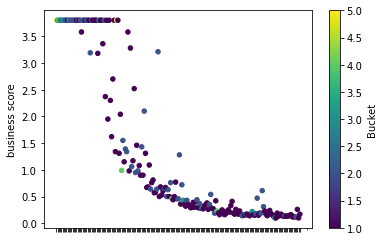

In [12]:
ax1 = k_df2.plot.scatter(
    x = 'City',
    y = 'business score',
    c = 'Bucket',
    colormap = 'viridis'
)